In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('customer_churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
customer_5 = df.iloc[:, 4] # too 5 and 15 columns 
customer_15 = df.iloc[:,15]

# We took male gender, citizen, and the Pytmanet method as an electronic check  
senior_male_electronic = df[(df['gender']== 'Male') &
                              (df['SeniorCitizen'] == 1) &
                              (df['PaymentMethod'] =='Electronic Cheack')] 

# We define the tenure as greater than 70 and the monthly charges as>100 

customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]

# We filtered the contacts of two years and payment method as mailed checked, and they have left the company, i.e, they have churned 
two_mail_yes = df[(df['Contract'] == 'Two year') &
                  (df['PaymentMethod'] == 'Mailed Cheack') &
                  (df['Churn'] == 'Yes')]


In [9]:
customer_333 = df.sample(n=333, random_state=42) # randome 333 fro coustomer 

In [11]:
churn_count = df['Churn'].value_counts()
# We take the modified data from churn customers and then count the different churn levels 

In [13]:
print(churn_count) # hence print it 


Churn
No     5174
Yes    1869
Name: count, dtype: int64


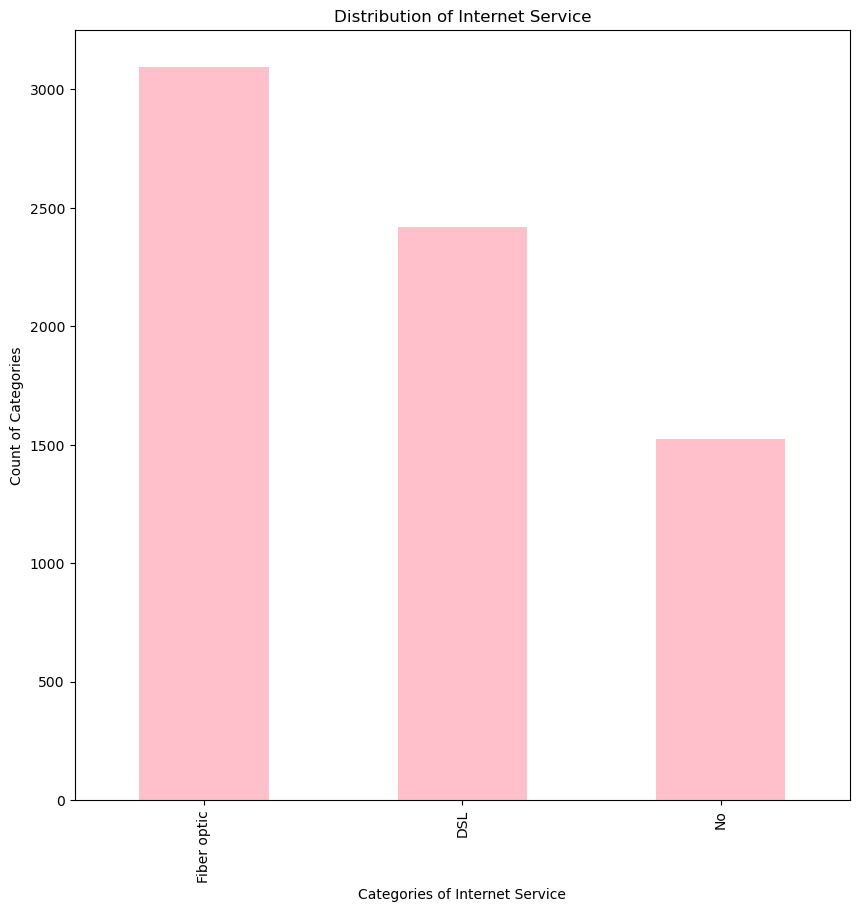

In [15]:
# Plotted a bar chart for the distribution of the internet service 
# x = categories of internet services and y count of the categories  

plt.figure(figsize=(10, 10))
df['InternetService'].value_counts().plot(kind='bar', color='pink')
plt.xlabel('Categories of Internet Service' )
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service' )
plt.show()


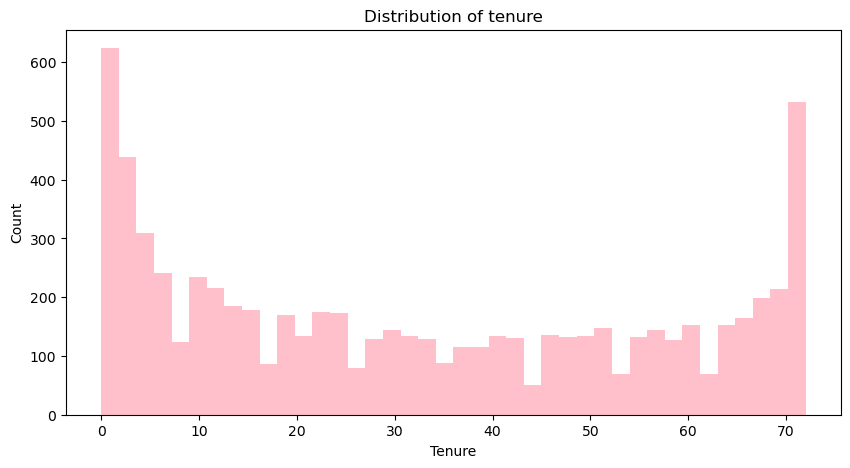

In [17]:
# Plot a histogram for the tenure of the customers 

plt.figure(figsize=(10, 5))
plt.hist(df['tenure'], bins=40,  color='pink')
plt.title('Distribution of tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()
           

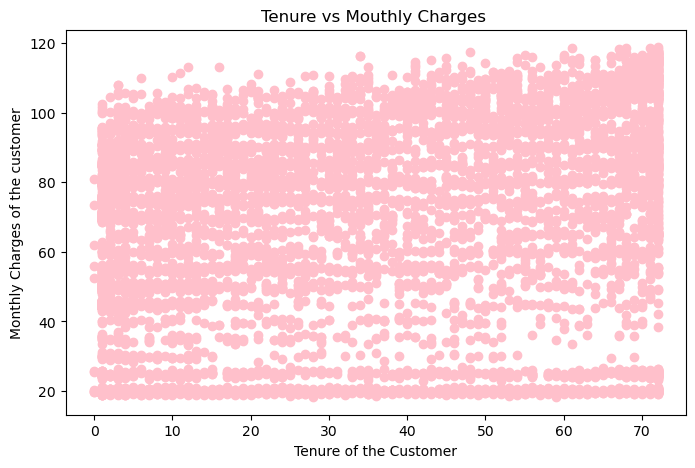

In [19]:
# plotted a scatter plot for monthly charges vs tenure 
# x tenure of the customer, y for the monthly charges of the customer.

plt.figure(figsize=(8, 5))
plt.scatter(df['tenure'], df['MonthlyCharges'], color= 'pink')
plt.xlabel('Tenure of the Customer')
plt.ylabel('Monthly Charges of the customer')
plt.title('Tenure vs Mouthly Charges ')
plt.show()

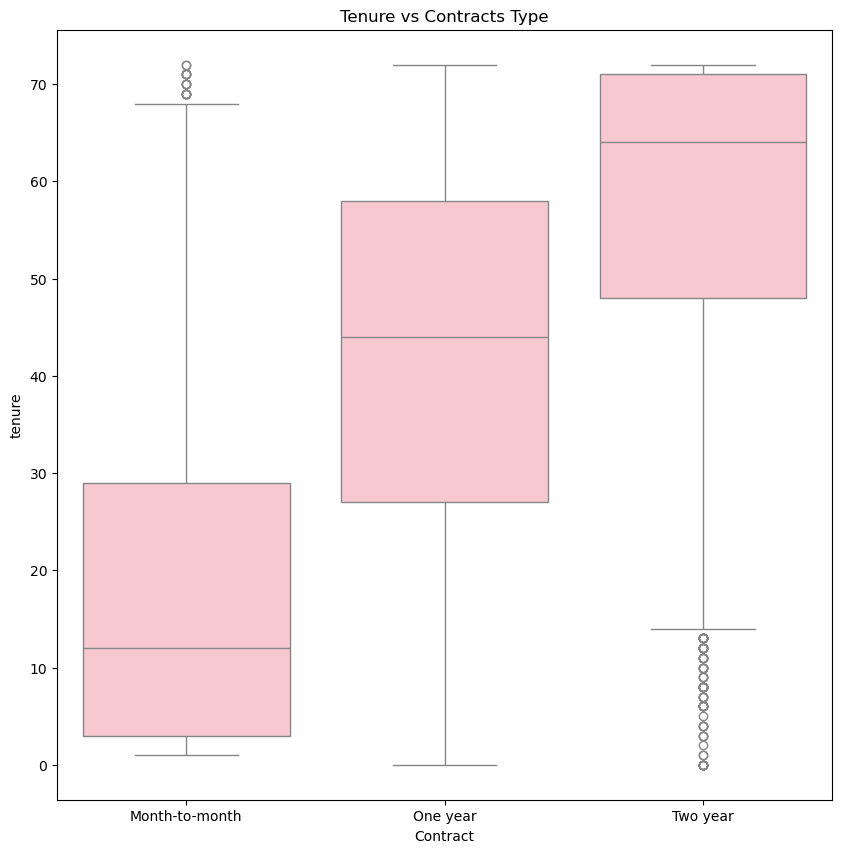

In [21]:
# Plotted the box plot for the tenure vs contarcts type,
# and the x-axis = tenure and the y-axis = contract type 

plt.figure(figsize=(10, 10))
sns.boxplot(x='Contract', y='tenure', data=df , color='pink' )
plt.title('Tenure vs Contracts Type')
plt.show()

In [23]:
X = df[['tenure']]
y = df[['MonthlyCharges']]
#defining the tenure and the monthly charges 

# train the data in x and y with a size of 0.3 and random state 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# We create and TRAIN the learner regression model 
model = LinearRegression()
model.fit(X_train, y_train)


# Make a prediction on the tested data 
y_pred = model.predict(X_test)



# calculate the error, i.e, difference between actual and prededcted values, and the average of the 
error = y_test - y_pred
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squeared Error : ", rmse)

Root Mean Squeared Error :  29.07936015646814


C:\Users\ishas\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [27]:


X = df[['MonthlyCharges']]
y = df['Churn_binary']

# we split the data in size 35 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

#perfrom logistic reggrasion 
log_model = LogisticRegression()
log_model.fit(X_train, y_train) 



#predeict teh test 
y_pred = log_model.predict(X_test)


# printh the confusion matric and the acuracy score 
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

[[1797    0]
 [ 669    0]]
Accuracy Score: 0.7287104622871047


In [29]:
X = df[['MonthlyCharges', 'tenure']]
y = df['Churn_binary']


#we split the data into 80:20spilts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# we create logitic reggration model as multi_model 

multi_model = LogisticRegression()
multi_model.fit(X_train, y_train)

# we do predection on tested set 
y_pred = multi_model.predict(X_test)


# and print the accuracy scroe and the confusion matric
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))



[[944  92]
 [193 180]]
Accuracy Score: 0.7977288857345636


In [46]:
X = df[['tenure']]
y = df['Churn_binary']


#splits teh in 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#creating the decision tree clasifier 
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

#pred the test 
y_pred = dt_model.predict(X_test)

# printed teh confusion matrix 
print(confusion_matrix(y_test, y_pred))
# printed the Accuracy Score 
print ("Accuracy Score:", accuracy_score(y_test, y_pred))

[[951  85]
 [257 116]]
Accuracy Score: 0.7572746628814763


In [88]:
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn_binary']

#split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

[[1083  189]
 [ 276  213]]
Accuracy Score: 0.7359454855195912
